## In this notebook we study the following single species coagulation reaction with sopantaneous creation and destruction:

\begin{equation}
\begin{split}
    A &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
    B &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
    C &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
\end{split}
\end{equation}

\begin{equation}
    A + B\rightarrow^{k_3} C    
\end{equation}

## Starting from Poisson initial conditions. 

## We numerically solve the Chemical Master Equation by bouding the state space.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.append('../')
sys.path.append('../src')

from src import emre


## Setting up the reaction stoichiometry, rates and initial conditions

In [4]:
# Setting up the reactions and the parameters:

#Number of species in the reaction system
num_species     = 3 

#Number of interating reactions in the Hamiltonian
num_interaction = 1 

#This counts the total number of possible reactions in the system.
#We have 2N creation and destruction reactions and the rest interaction reactions
num_reactions   = 2*num_species + num_interaction 

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([4,4,3]) #len must be equal to num_species
k2 = np.array([3,2,3]) #len must be equal to num_species

# Interaction reactions:
k3 = np.array([1.]) #len must be equal to num_interactions    

#Defining the stoichiometry for the reactions
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])

#Write this for all reactions in the interacting Hamiltonian corresponding to the reaction rate k3
s_i[0] = [0,0,1] 
r_i[0] = [1,1,0]

rxn_par = [k1,k2,k3]

#The initial mean concentration of the species
initial_values = k1/k2


### Define simulation times

In [5]:
tstart = 0.
tfinal = 1.
tstep = 0.001

### Define the EMRE class using this data

In [6]:
system = emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)

In [12]:
emre.initialize_dynamics(system,initial_values,tstart,tfinal,tstep,measureResponse=True,volume=1.)
emre.runDynamics(system)

999it [00:07, 127.12it/s]                                                                                                                                        


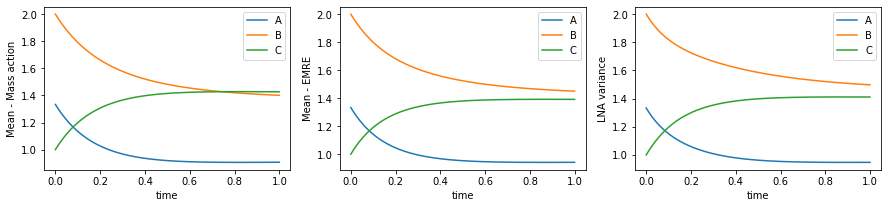

In [11]:
plt.figure(figsize=(15,3))
plt.subplot(131)
for i in range(system.num_species):
    plt.plot(system.timeGrid,system.y[i])
plt.xlabel('time')
plt.ylabel('Mean - Mass action')
plt.legend(['A','B','C'])

plt.subplot(132)
for i in range(system.num_species):
    plt.plot(system.timeGrid,system.y[i]+system.eps[i])
plt.xlabel('time')
plt.ylabel('Mean - EMRE')
plt.legend(['A','B','C'])

plt.subplot(133)
for i in range(system.num_species):
    plt.plot(system.timeGrid,system.lna_var[i,i])
plt.xlabel('time')
plt.ylabel('LNA variance')
plt.legend(['A','B','C'])


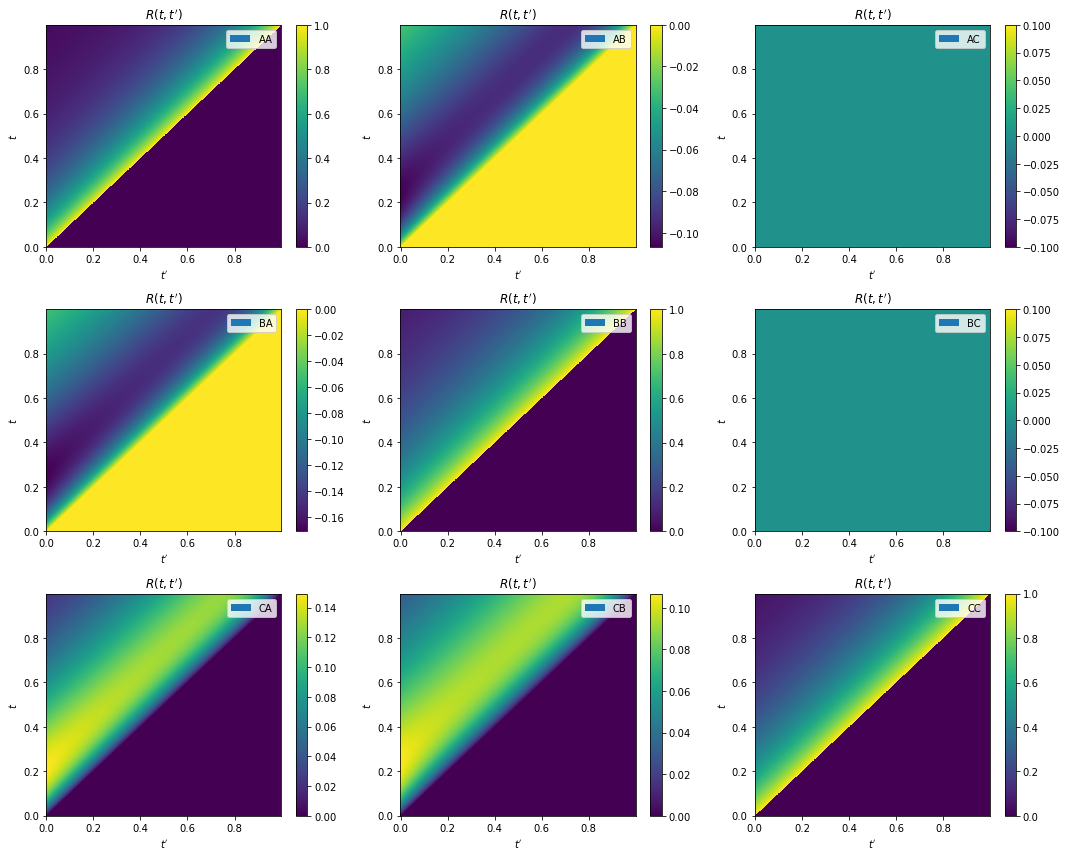

In [10]:
plt.figure(figsize=(15,12))
k=1
for i in range(system.num_species):
    for j in range(system.num_species):
        plt.subplot(3,3,k)
        plt.pcolor(system.timeGrid,system.timeGrid,system.resp[i,j])
        plt.title(r'$R(t,t^\prime)$')
        plt.ylabel(r'$t$')
        plt.xlabel(r'$t^\prime$')
        plt.colorbar()
        plt.legend([chr(65+i)+chr(65+j)])
        k += 1
plt.tight_layout()